<a href="https://colab.research.google.com/github/amir-seddighi/My-Credit-Risk-Model/blob/main/Credit_Risk_Model_Amir's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Upload the modeling dataset: "training.csv" 
from google.colab import files          
uploaded = files.upload()

Saving training.csv to training (1).csv


In [ ]:
#Read the dataset
data = pd.read_csv('training.csv') 

#Let's see the first few rows of the dataset
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
#Removing the id column as it is not useful for model development
data = data.drop(['Unnamed: 0'], axis=1) 

#Data praparation

In [ ]:
#the training dataset has 150000 observation and 11 features
data.shape

(150000, 11)

In [ ]:
# 10026 Defaulters. Less than 7% Default rate
Number_Of_Defaulters = data.loc[data['SeriousDlqin2yrs']==1].shape[0]
Default_Rate = Number_Of_Defaulters/ data.shape[0]

print ('Number of Defaulters=', Number_Of_Defaulters)
print ('Default Rate = %', Default_Rate*100)


Number of Defaulters= 10026
Default Rate = % 6.683999999999999


In [ ]:
#No categorical variable in the dataset. We don't need One-Hot-Encoding
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [ ]:
# There are missing values in the following features:
# "Monthly Income" and 
# "Number-of-Dependants" 

data.isnull().sum(axis=0)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
#Let's look at the distribution of all the features
#It is noted that most features have outliers (Compare the max value with the 75 percentile)
#Particularly, the "Debt Ratio" outliers seem to be extremely out of range. They need to be further investigated.

data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
#My guess: the extreme outliers in the "Debt Ratio" column are due to the missing values (or zeros) in the "Monthly Income" column.
#Let's see if my guess is accurate
#To figure out, let's look at the dataset where the "Monthly Income" values are missing.
#AS shown in the table below, all "Debt Ratio" values for these observations are extremely large.

data.loc[data['MonthlyIncome'].isnull()==True].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,0.0,29731.000000,29731.000000,29731.000000,29731.000000,25807.000000
mean,0.056137,6.649421,56.362349,0.579866,1673.396556,NaN,7.216071,0.484612,0.871481,0.452995,0.316310
std,0.230189,217.814854,15.438786,6.255361,4248.372895,NaN,4.842720,6.250408,1.034291,6.242076,0.809944
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016027,46.000000,0.000000,123.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081697,57.000000,0.000000,1159.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.440549,67.000000,0.000000,2382.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [ ]:
#Let's begin with replacing the missing values for "Number-Of-Dependents"
#Sine there are only 3924 observations (out of 150000) with missing "Number-Of-Dependents, we can reasonably replace them with zero.
#Here, the assumption is that these missing values exist because the feature was not applicable to the borrowe (i.e., zero)

data['NumberOfDependents'] = data['NumberOfDependents'].where(data['NumberOfDependents'].isnull()!=True, 0)


# Now, replacing missing vaues for "Monthly Income"
# Approach 1: Replacing missing vaues with the average of all observations
# It was actually found out that this approach was inferior to the Approach 2. So we won't do so.

  #data['MonthlyIncome'] = data['MonthlyIncome'].fillna( data['MonthlyIncome'].mean()) 



# Approach 2: We simple remove all such observation. We will still have ~120000 observation left; so, we can afford to do so.
# Also, it was noted that some observations had exteremely low "Monthly Income" which was considered data anamoly. 
# As such, I decided to set a minimum of 500 "Monthly Income"
# This approach resulted in higher model performance.


data = data.dropna()                                                                     #Removing all observations with missing Monthly Income 
data['MonthlyIncome'] = data['MonthlyIncome'].where(data['MonthlyIncome']>500, 500  )    #Setting a minimum of 500 for Monthly Income


#We are now left with 120269 observations. 
data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(120269, 11)

In [ ]:
#Making sure there are no more missing values
data.isnull().sum(axis=0)

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

NumberOfTime60-89DaysPastDueNotWorse


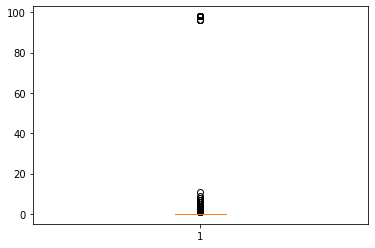

NumberOfTime60-89DaysPastDueNotWorse > 11: 148
Unique values: [ 0  1  2  5 98  4  3  6  7  8 11  9 96] 



NumberOfTimes90DaysLate


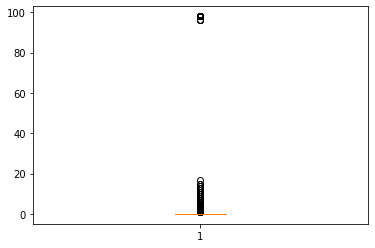

NumberOfTimes90DaysLate > 17: 148
Unique values: [ 0  1  3  2  4 98 10  5  6  7  8  9 15 11 96 13 14 17 12] 



NumberOfTime30-59DaysPastDueNotWorse


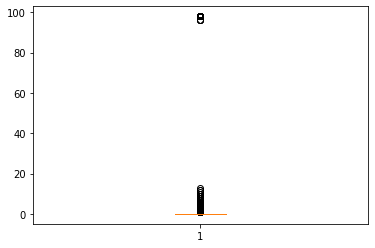

NumberOfTime30-59DaysPastDueNotWorse > 13: 148
Unique values: [ 2  0  1  3  5  4  7 10  6 98 12  8  9 96 13 11] 



RevolvingUtilizationOfUnsecuredLines


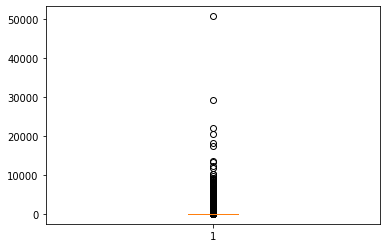

RevolvingUtilizationOfUnsecuredLines > 2: 278
Unique values: [0.76612661 0.95715102 0.65818014 ... 0.04067386 0.29974515 0.85028295] 



age


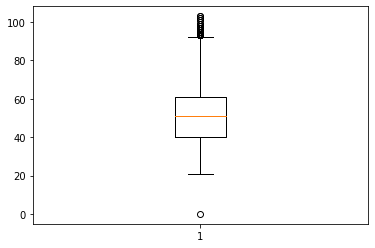

age > 100: 6
Unique values: [ 45  40  38  30  49  74  39  57  51  46  76  64  53  43  25  32  58  50
  69  24  28  42  75  26  52  41  31  68  70  62  73  29  55  35  60  67
  27  36  56  37  66  83  34  44  80  47  61  59  77  48  81  63  54  33
  72  79  92  78  23  65  87  71  84  82  22  89  91  86  88  85  90  93
  21  94  96  97  98 103 102  95  99   0 101] 



NumberOfDependents


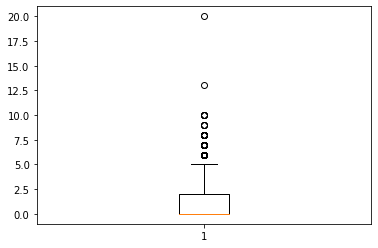

NumberOfDependents > 5: 232
Unique values: [ 2.  1.  0.  3.  4.  5.  6.  8.  7. 20. 10.  9. 13.] 



NumberOfOpenCreditLinesAndLoans


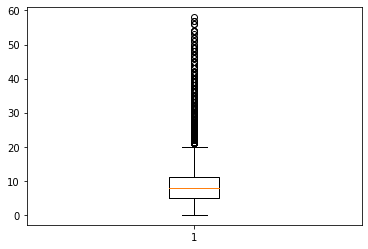

NumberOfOpenCreditLinesAndLoans > 20: 3472
Unique values: [13  4  2  5  7  3  8  9  6 10 14 22 17  1 15 31 12 21 11 19 18 26 20 23
  0 16 27 29 28 24 25 32 46 30 33 34 37 38 36 54 43 45 35 49 57 48 40 58
 51 52 39 41 56 42 47 50 44 53] 



MonthlyIncome


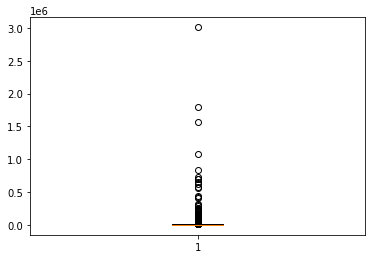

MonthlyIncome < 1000: 115474
Unique values: [ 9120.  2600.  3042. ... 15648.   521.  7647.] 



DebtRatio


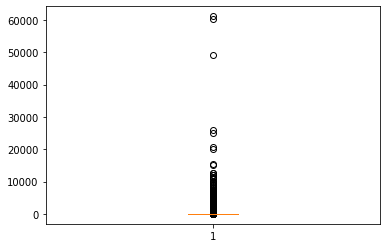

DebtRatio > 5: 2352
Unique values: [0.80298213 0.1218762  0.08511338 ... 0.40429286 0.71656222 0.24990808] 





In [ ]:
#Now lets look at the box plots for all features
# in this part of the code, I'm also looking at the unique values in each column.
# The goal is to determine the outliers that should be replaced
# In the next part, I replaced outliers based on the visual distribution of each variable. That is, all those observations were set equal to a maximum value 

print('NumberOfTime60-89DaysPastDueNotWorse')
plt.boxplot(data['NumberOfTime60-89DaysPastDueNotWorse'])
plt.show()
print( 'NumberOfTime60-89DaysPastDueNotWorse > 11:', data.loc[data['NumberOfTime60-89DaysPastDueNotWorse']>11].shape[0])
print('Unique values:', data['NumberOfTime60-89DaysPastDueNotWorse'].unique(), '\n\n\n')

#___________________________________________________________________________

print('NumberOfTimes90DaysLate')
plt.boxplot(data['NumberOfTimes90DaysLate'])
plt.show()
print( 'NumberOfTimes90DaysLate > 17:', data.loc[data['NumberOfTimes90DaysLate']>17].shape[0])
print('Unique values:', data['NumberOfTimes90DaysLate'].unique(), '\n\n\n')

#___________________________________________________________________________

print('NumberOfTime30-59DaysPastDueNotWorse')
plt.boxplot(data['NumberOfTime30-59DaysPastDueNotWorse'])
plt.show()
print( 'NumberOfTime30-59DaysPastDueNotWorse > 13:', data.loc[data['NumberOfTime30-59DaysPastDueNotWorse']>13].shape[0])
print('Unique values:', data['NumberOfTime30-59DaysPastDueNotWorse'].unique(), '\n\n\n')

#___________________________________________________________________________

print('RevolvingUtilizationOfUnsecuredLines')
plt.boxplot(data['RevolvingUtilizationOfUnsecuredLines'])
plt.show()
print( 'RevolvingUtilizationOfUnsecuredLines > 2:', data.loc[data['RevolvingUtilizationOfUnsecuredLines']>2].shape[0])
print('Unique values:', data['RevolvingUtilizationOfUnsecuredLines'].unique(), '\n\n\n')

#___________________________________________________________________________


print('age')
plt.boxplot(data['age'])
plt.show()
print( 'age > 100:', data.loc[data['age']>100].shape[0])
print('Unique values:', data['age'].unique(), '\n\n\n')

#___________________________________________________________________________


print('NumberOfDependents')
plt.boxplot(data['NumberOfDependents'])
plt.show()
print( 'NumberOfDependents > 5:', data.loc[data['NumberOfDependents']>5].shape[0])
print('Unique values:', data['NumberOfDependents'].unique(), '\n\n\n')

#___________________________________________________________________________

print('NumberOfOpenCreditLinesAndLoans')
plt.boxplot(data['NumberOfOpenCreditLinesAndLoans'])
plt.show()
print( 'NumberOfOpenCreditLinesAndLoans > 20:', data.loc[data['NumberOfOpenCreditLinesAndLoans']>20].shape[0])
print('Unique values:', data['NumberOfOpenCreditLinesAndLoans'].unique(), '\n\n\n')

#___________________________________________________________________________

print('MonthlyIncome')
plt.boxplot(data['MonthlyIncome'])
plt.show()
print( 'MonthlyIncome < 1000:', data.loc[data['MonthlyIncome']>1000].shape[0])
print('Unique values:', data['MonthlyIncome'].unique(), '\n\n\n')

#___________________________________________________________________________


print('DebtRatio')
plt.boxplot(data['DebtRatio'])
plt.show()
print( 'DebtRatio > 5:', data.loc[data['DebtRatio']>5].shape[0])
print('Unique values:', data['DebtRatio'].unique(), '\n\n\n')

#___________________________________________________________________________


In [ ]:
# Based on the information obtaine from the box plots and unique values in each column, Here I replace the outliers with the appropriate maximum values:

data['NumberOfTime60-89DaysPastDueNotWorse'] = data['NumberOfTime60-89DaysPastDueNotWorse'].where(data['NumberOfTime60-89DaysPastDueNotWorse']<11,11   )
data['NumberOfTimes90DaysLate'] = data['NumberOfTimes90DaysLate'].where(data['NumberOfTimes90DaysLate']<17, 17   )
data['NumberOfTime30-59DaysPastDueNotWorse'] = data['NumberOfTime30-59DaysPastDueNotWorse'].where(data['NumberOfTime30-59DaysPastDueNotWorse']<13,  13 )
data['RevolvingUtilizationOfUnsecuredLines'] = data['RevolvingUtilizationOfUnsecuredLines'].where(data['RevolvingUtilizationOfUnsecuredLines']<2, 2  )
data['age'] = data['age'].where(data['age']<100, 100   )
data['NumberOfOpenCreditLinesAndLoans'] = data['NumberOfOpenCreditLinesAndLoans'].where(data['NumberOfOpenCreditLinesAndLoans']<30,  30 )
data['NumberOfDependents'] = data['NumberOfDependents'].where(data['NumberOfDependents']<5,  5 )
data['DebtRatio'] = data['DebtRatio'].where(data['DebtRatio']<2,  2 )


In [ ]:
# 8357 Defaulters. Still around 7% Default rate. The data exclusions did not significantly change the overall Default rates.
Number_Of_Defaulters = data.loc[data['SeriousDlqin2yrs']==1].shape[0]
Default_Rate = Number_Of_Defaulters/ data.shape[0]

print ('Number of Defaulters=', Number_Of_Defaulters)
print ('Default Rate = %', Default_Rate*100)


Number of Defaulters= 8357
Default Rate = % 6.948590243537403


In [ ]:
#See the dataset one more time
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
#Now lets standardize the variables. 
#Note that the first column in the dataset is actually the target variable (0 and 1). No need to standardize that.
#I standardized the features using Z-Score and saved them in a new dataset called "Normalized_data"

from scipy.stats import zscore

Normalized_data = data.iloc[:, 1:].apply(zscore)
Normalized_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.191329,-0.435989,2.036166,1.063052,0.169656,0.836847,-0.146168,4.303154,-0.158521,1.015956
1,1.719341,-0.782578,-0.327671,-0.670844,-0.283748,-0.932175,-0.146168,-0.917557,-0.158521,0.133522
2,0.892954,-0.921214,0.854247,-0.764431,-0.253011,-1.325291,1.155243,-0.917557,-0.158521,-0.748912
3,-0.280051,-1.475758,-0.327671,-0.889333,-0.235070,-0.735617,-0.146168,-0.917557,-0.158521,-0.748912
4,1.581380,-0.158717,0.854247,-0.917652,3.957389,-0.342501,-0.146168,-0.047438,-0.158521,-0.748912


In [ ]:
X = Normalized_data                 # X is the standardized features 
Y = data[['SeriousDlqin2yrs']]      # Y is the binary target variable


In [ ]:
#Let's see the P-value of each feature. It will help with the feature selection

from sklearn.feature_selection import f_classif as fc

result = fc(X, Y)

P_Value = result[1]

columns = list(X.columns)

i=int(-1)
for c in columns:
 i+=1
 print(c,':', P_Value[i])      #Seems like all P_values are very close to Zero; except for the "NumberRealEstateLoansOrLines"



RevolvingUtilizationOfUnsecuredLines : 0.0
age : 3.196154318054582e-279
NumberOfTime30-59DaysPastDueNotWorse : 0.0
DebtRatio : 3.449835622036602e-61
MonthlyIncome : 5.924228711484068e-12
NumberOfOpenCreditLinesAndLoans : 6.736486266595393e-23
NumberOfTimes90DaysLate : 0.0
NumberRealEstateLoansOrLines : 0.297341811445929
NumberOfTime60-89DaysPastDueNotWorse : 0.0
NumberOfDependents : 6.552361979610341e-60


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# "NumberRealEstateLoansOrLines" has a high P-value and thus, removed from the data:
X = X.drop(['NumberRealEstateLoansOrLines'], axis=1) 

In [ ]:
#Let's look at the covariance matrix to understand the relationship between the predictors and target variable.
#If there's high correlation between two variables, one of them may be dropped to avoid multicollinaerity
# Also, variables with less than 4% correlation with the target variable will be dropped.

correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.272479,-0.102688,0.267409,0.047562,-0.019841,-0.028402,0.247389,-0.003005,0.223566,0.047048
RevolvingUtilizationOfUnsecuredLines,0.272479,1.000000,-0.261633,0.238742,0.094064,-0.034767,-0.170142,0.204921,-0.075994,0.180070,0.082518
age,-0.102688,-0.261633,1.000000,-0.071231,-0.052102,0.037554,0.188983,-0.077305,0.065114,-0.069695,-0.208446
NumberOfTime30-59DaysPastDueNotWorse,0.267409,0.238742,-0.071231,1.000000,0.041750,-0.006970,0.027518,0.525886,0.013956,0.567698,0.045590
DebtRatio,0.047562,0.094064,-0.052102,0.041750,1.000000,-0.092171,0.229204,-0.029509,0.351463,-0.007036,0.045770
MonthlyIncome,-0.019841,-0.034767,0.037554,-0.006970,-0.092171,1.000000,0.091714,-0.020381,0.124801,-0.015141,0.063129
NumberOfOpenCreditLinesAndLoans,-0.028402,-0.170142,0.188983,0.027518,0.229204,0.091714,1.000000,-0.108117,0.426505,-0.061953,0.040134
NumberOfTimes90DaysLate,0.247389,0.204921,-0.077305,0.525886,-0.029509,-0.020381,-0.108117,1.000000,-0.064029,0.701874,0.014914
NumberRealEstateLoansOrLines,-0.003005,-0.075994,0.065114,0.013956,0.351463,0.124801,0.426505,-0.064029,1.000000,-0.038165,0.120369
NumberOfTime60-89DaysPastDueNotWorse,0.223566,0.180070,-0.069695,0.567698,-0.007036,-0.015141,-0.061953,0.701874,-0.038165,1.000000,0.017813


In [ ]:
#Although no multicollinearty was observed in the matrix above, the following features are dropped because of low correlation with the target variable:

X = X.drop(['NumberOfOpenCreditLinesAndLoans'], axis=1) 
X = X.drop(['MonthlyIncome'], axis=1)                     #I beleive the "DebtRatio" variable already contains information about "Income". 
                                                          #So we won't lose much information by dropping "Monthly Income"


#Now we are left with 120269 observations and 7 variables

X.shape

(120269, 7)

In [ ]:
#Splitting the X and Y datasets into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1234, stratify=Y)

#Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

#Grid Search and cross validation to fine tune the hyper-parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate



LR = LogisticRegression()

LR_parameters = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10],            #C is 1/lamda in Lasso. So, smaller C: bigger lambda: less overfitting
                  'penalty':['l1', 'l2', 'elasticnet'],        #L1: Lasso Regularization, L2: Ridge
                  'solver':['liblinear', 'lbfgs', 'saga']}     #So this grid will have 7*3*3=63 combinations
                                                            

LR_RandomSearch = RandomizedSearchCV(estimator=LR,
                        param_distributions=LR_parameters,
                        scoring='accuracy',
                        n_iter=20,                           # How many different combinations do you want out of 63?
                        cv=3,                                # 3-Fold Cross Validation. So, 20*3=60 individual runs will be performed
                        return_train_score= True)                  

LR_RandomSearch_fit = LR_RandomSearch.fit(X_train, Y_train)


In [ ]:
#To directly get the best parameters for our model:
LR_RandomSearch_fit.best_params_  

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}

In [ ]:
#Now train the LR model using the fine tuned hyper-parameters

import sklearn
LR = sklearn.linear_model.LogisticRegression(penalty='l2', C=0.01, solver='liblinear')
LR.get_params(deep=True)

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Train the LR model

LR.fit(X_train, Y_train)

# Create Y Predictions
Y_predict = LR.predict(X_test)  
Y_predict = pd.DataFrame(Y_predict)   # Y_predict would be a Pandas Series, lets convert it to Pandas DaraFrame


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Although not used as a performance measure but let's look at the confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_test, Y_predict)
cm                                           #390 TP and 239 FP. 

array([[33397,   177],
       [ 2238,   269]])

In [ ]:
#Let's calculate the probability of each case in the X_test:
Y_probability = LR.predict_proba(X_test)
Y_probability

array([[0.93191698, 0.06808302],
       [0.93261739, 0.06738261],
       [0.88029257, 0.11970743],
       ...,
       [0.97833403, 0.02166597],
       [0.95069705, 0.04930295],
       [0.95975787, 0.04024213]])

AUC testset:  0.8347067123117402


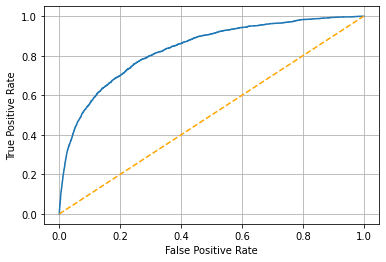

In [ ]:
#I used AUC and ROC Curve as a performance measure
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_probability[:,1])
roc_auc = auc(fpr, tpr)
print('AUC testset: ', roc_auc)                             #83.4% AUC. Awesome!!

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

plt.plot([0, 1], [0, 1], color='orange',  linestyle='--')  # 50% line
plt.show()


RevolvingUtilizationOfUnsecuredLines : 0.6174615291158861
age : -0.1826397609495992
NumberOfTime30-59DaysPastDueNotWorse : 0.3284974504210352
DebtRatio : 0.12667240814548697
NumberOfTimes90DaysLate : 0.2955765435782358
NumberOfTime60-89DaysPastDueNotWorse : 0.15042862574403792
NumberOfDependents : 0.06429902358017517


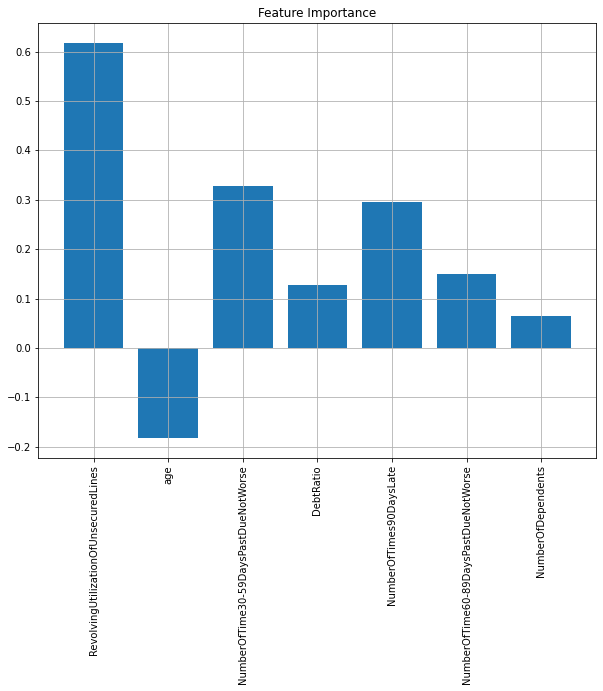

In [ ]:
#Let's take a look at the feature importance of each variable. The direction of variables is meaningful and intuitive.
feature_importance = LR.coef_[0]

i=-1
for c in X.columns:
 i=i+1
 print(c, ":", feature_importance[i])

fig = plt.figure(figsize=[10,8]) 
plt.title('Feature Importance') 
plt.bar(X.columns,feature_importance)
plt.grid()
plt.xticks(rotation=90 )
plt.show()

In [ ]:
# Save the trained model to disk for future use

import joblib
filename = 'PD_MODEL.sav'      # I name my model "PD_Model"
joblib.dump(LR, filename)


['PD_MODEL.sav']

In [ ]:
# In case you want to load the trained model from disk

from google.colab import files        
uploaded = files.upload()

filename = 'PD_MODEL.sav'
LR= joblib.load(filename)


#Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Grid Search and cross validation to fine tune the hyper-parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate


DTC = DecisionTreeClassifier()

DTC_parameters = {'min_samples_leaf':[ 15, 20, 30 ], 'max_depth':[2,3,4,5]}     #I beleive these two parameters in a Decision Tree are the most important  
                                                                                #So this grid will have 3*4=12 combinations            
                                                           

DTC_RandomSearch = RandomizedSearchCV(estimator=DTC,
                        param_distributions=DTC_parameters,
                        scoring='accuracy',
                        n_iter=10,                          # How many different combinations do you want out of 12?
                        cv=3,                               # 3-Fold Cross Validation. So, 10*3=30 individual runs will be performed
                        return_train_score= True)                  

DTC_RandomSearch_fit = DTC_RandomSearch.fit(X_train, Y_train)


In [ ]:
#To directly get the best parameters:
DTC_RandomSearch_fit.best_params_  

{'min_samples_leaf': 20, 'max_depth': 4}

In [ ]:
#Now train the DTC model using the fine tuned hyper-parameters

DTC = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, splitter= 'best' ,random_state=1234)
DTC.fit(X_train, Y_train)


# Create Y Predictions
Y_predict = DTC.predict(X_test)  
Y_predict = pd.DataFrame(Y_predict)   # Y_predict would be a Pandas Series, lets convert it to Pandas DaraFrame

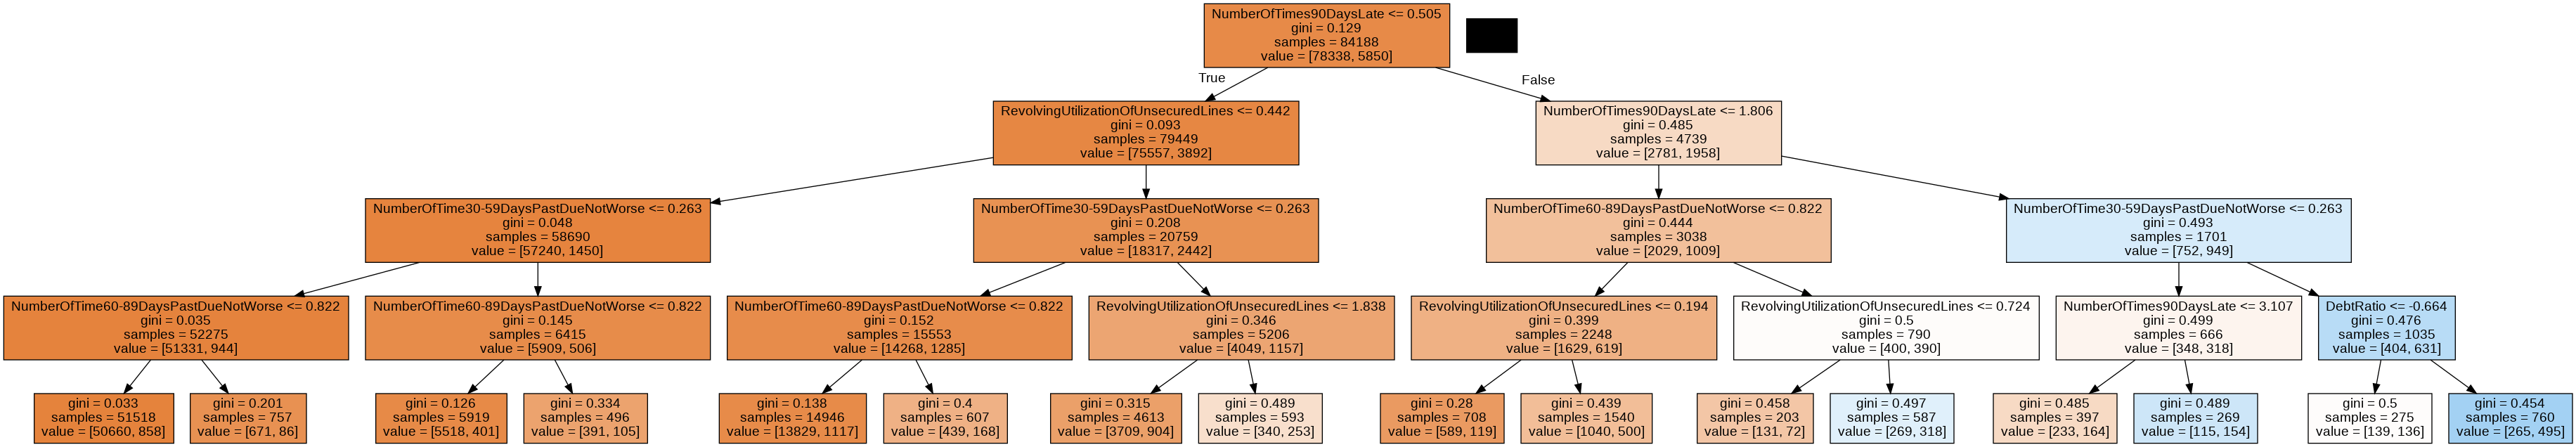

In [ ]:
#Display the classification tree
from IPython.display import Image
import pydotplus


dot_data = tree.export_graphviz(DTC, out_file = None, feature_names= X_train.columns, filled= True)
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#Although not used as a performance measure but let's look at the confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_test, Y_predict)
cm

array([[33283,   291],
       [ 2139,   368]])

In [ ]:
#Let's calculate the probability of each case in the X_test:
Y_probability = DTC.predict_proba(X_test)

Y_probability

array([[0.93225207, 0.06774793],
       [0.98334563, 0.01665437],
       [0.80403208, 0.19596792],
       ...,
       [0.98334563, 0.01665437],
       [0.98334563, 0.01665437],
       [0.93225207, 0.06774793]])

AUC testset:  0.824505164059725


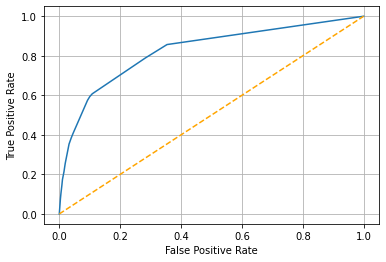

In [ ]:
#I used AUC and ROC Curve as a performance measure
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_probability[:,1])
roc_auc = auc(fpr, tpr)
print('AUC testset: ', roc_auc)                            #82.4% AUC. Great. But LR actually did slightly better!

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

plt.plot([0, 1], [0, 1], color='orange',  linestyle='--')  # 50% line
plt.show()


In [ ]:
#Let's take a look at the feature importance of each variable. 
#Unlike LR model, DTC has fewer important variables

feature_importance = DTC.feature_importances_ #it gives importance of all features
i=-1
for c in X.columns:
 i=i+1
 print(c, ":", feature_importance[i])


RevolvingUtilizationOfUnsecuredLines : 0.17619821162856641
age : 0.0
NumberOfTime30-59DaysPastDueNotWorse : 0.10345154556064749
DebtRatio : 0.004924729921008968
NumberOfTimes90DaysLate : 0.6477832253317057
NumberOfTime60-89DaysPastDueNotWorse : 0.06764228755807128
NumberOfDependents : 0.0


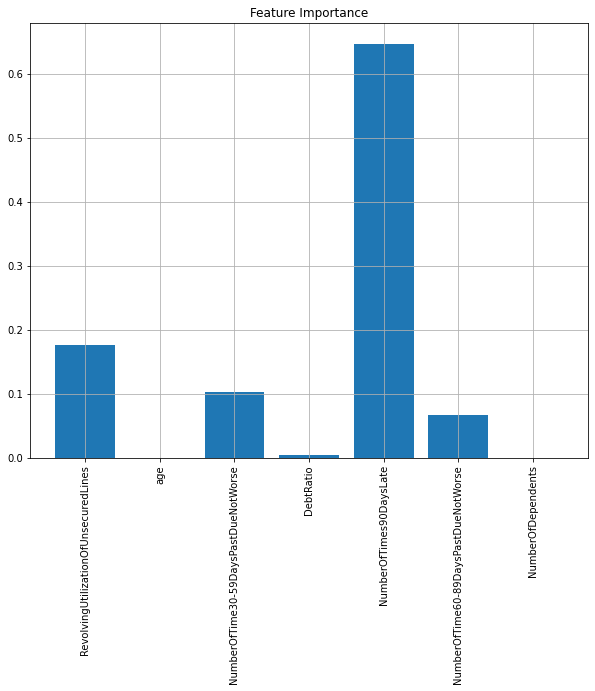

In [ ]:
#Visulaizing feature importance

fig = plt.figure(figsize=[10,8]) 
plt.title('Feature Importance') 
plt.bar(X.columns,feature_importance)
plt.grid()
plt.xticks(rotation=90 )
plt.show()

#Random Forest

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Grid Search and cross validation to fine tune the hyper-parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate


RF = RandomForestClassifier()

RF_parameters = { 'n_estimators': [100, 500], 'min_samples_leaf':[ 20, 30 ], 'max_depth':[4,5]}         #I beleive these 3 parameters in a RF are the most important           
                                                                                                        #So this grid will have 2*2*2=8 combinations

RF_RandomSearch = RandomizedSearchCV(estimator=RF,
                        param_distributions=RF_parameters,
                        scoring='accuracy',
                        n_iter=4,                           # How many different combinations do you want out of 8? RF takes a long time to train.
                        cv=3,                               # 3-Fold Cross Validation. So, 4*3=12 individual runs will be performed
                        return_train_score= True)                  

RF_RandomSearch_fit = RF_RandomSearch.fit(X_train, Y_train)

In [ ]:
#To directly get the best parameters:
RF_RandomSearch_fit.best_params_  

{'n_estimators': 100, 'min_samples_leaf': 30, 'max_depth': 5}

In [ ]:
#Now train the RF model using the fine tuned hyper-parameters

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100,  min_samples_leaf=30,  max_depth=5, random_state=1234)                                       
RF.fit(X_train, Y_train)

# Create Y Predictions
Y_predict = RF.predict(X_test)  
Y_predict = pd.DataFrame(Y_predict)   # Y_predict would be a Pandas Series, lets convert it to Pandas DaraFrame

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
#Although not used as a performance measure but let's look at the confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_test, Y_predict)
cm

array([[33412,   162],
       [ 2258,   249]])

In [ ]:
#Let's calculate the probability of each case in the X_test:
Y_probability = RF.predict_proba(X_test)
Y_probability


array([[0.9326697 , 0.0673303 ],
       [0.96532506, 0.03467494],
       [0.90004836, 0.09995164],
       ...,
       [0.98191435, 0.01808565],
       [0.95706441, 0.04293559],
       [0.94153714, 0.05846286]])

AUC testset:  0.8520349668928429


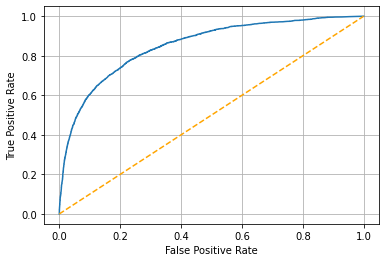

In [ ]:
#I used AUC and ROC Curve as a performance measure
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_probability[:,1])
roc_auc = auc(fpr, tpr)
print('AUC testset: ', roc_auc)                            # AUC = 85.2%. RF did slightly better than LR and DT but it's definitely comparable.

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

plt.plot([0, 1], [0, 1], color='orange',  linestyle='--')    # 50% line
plt.show()


RevolvingUtilizationOfUnsecuredLines : 0.21162844664973512
age : 0.018404572340505982
NumberOfTime30-59DaysPastDueNotWorse : 0.16393342622292661
DebtRatio : 0.019740539088222347
NumberOfTimes90DaysLate : 0.38027767295704307
NumberOfTime60-89DaysPastDueNotWorse : 0.20297622709342328
NumberOfDependents : 0.003039115648143595


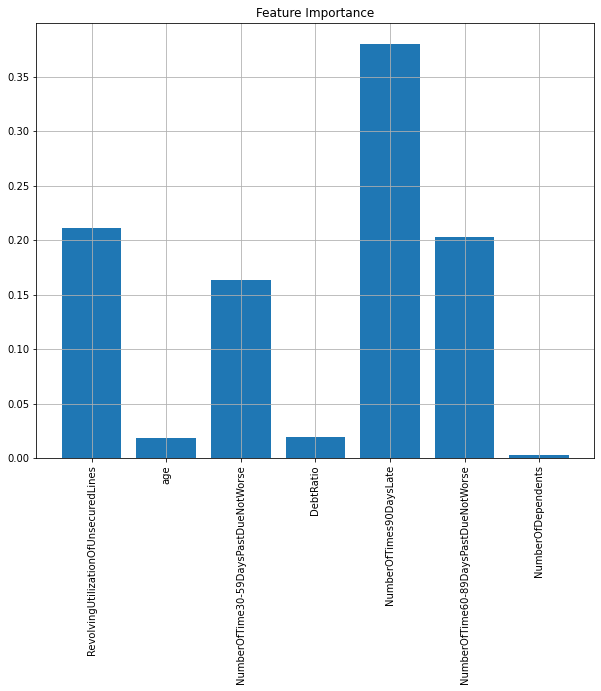

In [ ]:
#Let's take a look at the feature importance of each variable. 
#Feature importance is very similar to DTC. But the direction of variable "Age" is considered to be unintuitive.

feature_importance = RF.feature_importances_ #it gives importance of all features
i=-1
for c in X.columns:
 i=i+1
 print(c, ":", feature_importance[i])

 #Visulaizing feature importance

fig = plt.figure(figsize=[10,8]) 
plt.title('Feature Importance') 
plt.bar(X.columns,feature_importance)
plt.grid()
plt.xticks(rotation=90 )
plt.show()

#Artificial Neural Network

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers

from keras.models import Sequential
from keras.layers import Dense

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#Here, I'm building a sequantial ANN. It consists of the input layer which is fully connected to 5 hidden layers each having 16 neurons.
#Notice that the last layer has a Sigmoid function because this is a binary prediction

ANN = Sequential()
ANN.add( Dense(16, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='RandomNormal')   )
ANN.add( Dense(16, activation='relu', kernel_initializer='RandomNormal')   )
ANN.add( Dense(16, activation='relu', kernel_initializer='RandomNormal')   )
ANN.add( Dense(16, activation='relu', kernel_initializer='RandomNormal')   )
ANN.add( Dense(16, activation='relu', kernel_initializer='RandomNormal')   )
ANN.add( Dense(1, activation='sigmoid', kernel_initializer='RandomNormal')   )

ANN.summary()  
#See the number of parameters: 
#first layer (6*16 weights + 16 biases = 112)
#inner layers (16*16 weights + 16 biases = 272)
#last layer  (16*1 weights + 1 biases = 17)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,233
Trainable params: 1,233
Non-trainabl

In [ ]:
# adam=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)   #edit adam parameters
ANN.compile( optimizer= 'adam',
               loss= 'binary_crossentropy',
               metrics= ['accuracy'])

ANN.fit(X_train, Y_train, epochs=160, batch_size=200) #Mini_Batch implementation, running 160 times

dict_keys(['loss', 'accuracy'])


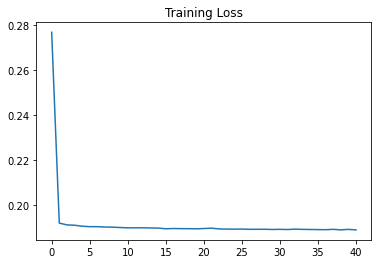

In [ ]:
# Plot history

print(ANN.history.history.keys())


plt.plot(ANN.history.history['loss'])
plt.title('Training Loss')

plt.show()


In [ ]:
#Let's calculate the probability of each case in the X_test:

Y_predict = (ANN.predict(X_test) > 0.5).astype("int32")
Y_probability = ANN.predict(X_test)

print('probability of the 11th case to be positive is' , Y_probability[11]  )
print('case 11th is being predicted to be:', Y_predict[11] )

probability of the 11th case to be positive is [0.10880563]
case 11th is being predicted to be: [0]


In [ ]:
Y_probability

array([[0.0781379 ],
       [0.03188467],
       [0.11414593],
       ...,
       [0.01175669],
       [0.04013705],
       [0.03680941]], dtype=float32)

In [ ]:
#Although not used as a performance measure but let's look at the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predict)
cm

array([[33341,   233],
       [ 2156,   351]])

AUC testset:  0.8506307138962474


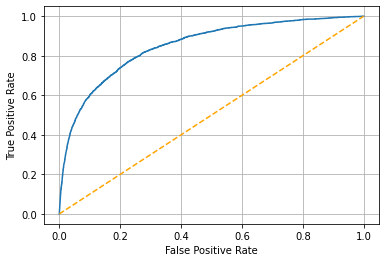

In [ ]:
#I used AUC and ROC Curve as a performance measure
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_probability)
roc_auc = auc(fpr, tpr)
print('AUC testset: ', roc_auc)                             #AUC = 85.0%. Not significantly higher than that of LR. SO we will stick to our LR model because that's a simpler model

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

plt.plot([0, 1], [0, 1], color='orange',  linestyle='--')  # 50% line
plt.show()


# TEST: PD Prediction using Logistic Regression Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Upload the TEST dataset: "test.csv" 
from google.colab import files          
uploaded = files.upload()

Saving PD_MODEL.sav to PD_MODEL.sav


In [ ]:
#Read the TEST dataset
TEST_DATA = pd.read_csv('test.csv')

#Let's see the first few rows of the dataset. The "SeriousDlqin2yrs" is to be predicted by my model
TEST_DATA.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [ ]:
#The following 7 variables were selected for or modeling

Selected_Variables = ['RevolvingUtilizationOfUnsecuredLines',
                      'NumberOfTime30-59DaysPastDueNotWorse',
                      'NumberOfTimes90DaysLate',
                      'NumberOfTime60-89DaysPastDueNotWorse',
                      'age',
                      'DebtRatio',
                      'NumberOfDependents']

# So, select those variables in the TEST dataset
TEST_DATA = TEST_DATA[Selected_Variables]
TEST_DATA.head()  

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,age,DebtRatio,NumberOfDependents
0,0.885519,0,0,0,43,0.177513,0.0
1,0.463295,0,0,0,57,0.527237,2.0
2,0.043275,0,0,0,59,0.687648,2.0
3,0.280308,1,0,0,38,0.925961,0.0
4,1.000000,0,0,0,27,0.019917,1.0


In [ ]:
# We should treat these 7 variables the same way we did for the modeling data. As such, the following replacements are performed:

TEST_DATA['NumberOfTime60-89DaysPastDueNotWorse'] = TEST_DATA['NumberOfTime60-89DaysPastDueNotWorse'].where(TEST_DATA['NumberOfTime60-89DaysPastDueNotWorse']<11, 11   )
TEST_DATA['NumberOfTimes90DaysLate'] = TEST_DATA['NumberOfTimes90DaysLate'].where(TEST_DATA['NumberOfTimes90DaysLate']<17,  17 )
TEST_DATA['NumberOfTime30-59DaysPastDueNotWorse'] = TEST_DATA['NumberOfTime30-59DaysPastDueNotWorse'].where(TEST_DATA['NumberOfTime30-59DaysPastDueNotWorse']<13,  13 )
TEST_DATA['RevolvingUtilizationOfUnsecuredLines'] = TEST_DATA['RevolvingUtilizationOfUnsecuredLines'].where(TEST_DATA['RevolvingUtilizationOfUnsecuredLines']<2, 2  )
TEST_DATA['age'] = TEST_DATA['age'].where(TEST_DATA['age']<100,  100 )
TEST_DATA['DebtRatio'] = TEST_DATA['DebtRatio'].where(TEST_DATA['DebtRatio']<2,  2 )
data['NumberOfDependents'] = data['NumberOfDependents'].where(data['NumberOfDependents']<5,  5 )


#checking data dimensions. 101503 Observations and 7 Variables.
TEST_DATA.shape

(101503, 7)

In [ ]:
#Check if there are any missing values in the TEST dataset
TEST_DATA.isnull().sum(axis=0)

RevolvingUtilizationOfUnsecuredLines       0
NumberOfTime30-59DaysPastDueNotWorse       0
NumberOfTimes90DaysLate                    0
NumberOfTime60-89DaysPastDueNotWorse       0
age                                        0
DebtRatio                                  0
NumberOfDependents                      2626
dtype: int64

In [ ]:
#Replacing missing values the same way we did for the modeling data

TEST_DATA['NumberOfDependents'] = TEST_DATA['NumberOfDependents'].where(TEST_DATA['NumberOfDependents'].isnull()!=True, 0)

In [ ]:
#Making sure there are no missing values in this dataset:
TEST_DATA.isnull().sum(axis=0)

RevolvingUtilizationOfUnsecuredLines    0
NumberOfTime30-59DaysPastDueNotWorse    0
NumberOfTimes90DaysLate                 0
NumberOfTime60-89DaysPastDueNotWorse    0
age                                     0
DebtRatio                               0
NumberOfDependents                      0
dtype: int64

In [ ]:
#Standardizing all 7 variables as we did for the model development
from scipy.stats import zscore

Normalized_TEST_DATA = TEST_DATA.apply(zscore)
Normalized_TEST_DATA.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,age,DebtRatio,NumberOfDependents
0,1.533205,-0.299849,-0.138265,-0.145214,-0.636380,-0.694647,-0.663791
1,0.377776,-0.299849,-0.138265,-0.145214,0.310878,-0.209534,1.108326
2,-0.771624,-0.299849,-0.138265,-0.145214,0.446201,0.012976,1.108326
3,-0.122974,0.792401,-0.138265,-0.145214,-0.974687,0.343547,-0.663791
4,1.846486,-0.299849,-0.138265,-0.145214,-1.718962,-0.913252,0.222267


In [ ]:
# Load the pre-trained LR model from disk

from google.colab import files        
uploaded = files.upload()

In [ ]:
# Here's the pre-trained model ready to run!

import joblib
filename = 'PD_MODEL.sav'
LR= joblib.load(filename)

In [ ]:
#Let's call our predictions TEST_PD and save those results

TEST_PD = LR.predict_proba(Normalized_TEST_DATA)  #Making predictions using LR model
TEST_PD = pd.DataFrame(TEST_PD[:,1])               #Turn the results into a Data Frame
TEST_PD


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,0
0,0.087139
1,0.069422
2,0.037985
3,0.028888
4,0.079326
...,...
101498,0.022522
101499,0.066618
101500,0.058020
101501,0.094861


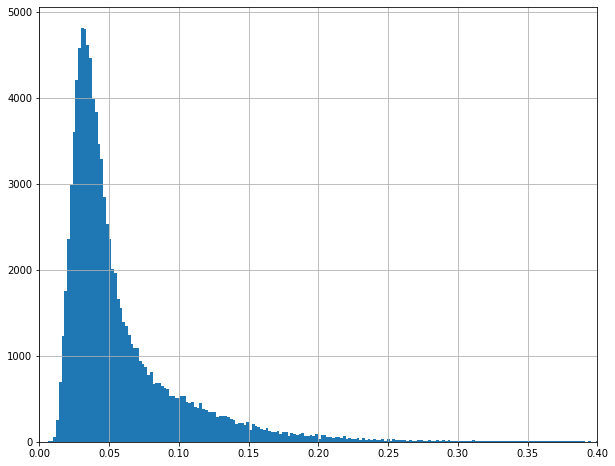

In [ ]:
#Let's look at the visual distribution of the default probabilities in the TEST dataset

fig = plt.figure(figsize=[10,8]) 
plt.hist(np.array(TEST_PD), bins=500)
plt.xlim(xmin=0, xmax=0.4)
plt.grid()
plt.show()

In [ ]:
#ALso let's look at some stats about the distribution of default probablities
# Based on the business risk tolerance, we can set a cut off point for our credit decisioning purposes.
TEST_PD.describe()

,0
count,101503.000000
mean,0.062526
std,0.069714
min,0.006157
25%,0.031365
50%,0.043087
75%,0.069354
max,0.993912


In [ ]:
#Combine the TEST_PD and TEST_DATA
Final_TEST_Results = pd.read_csv('test.csv')                           #Read the dataset again
Final_TEST_Results['SeriousDlqin2yrs'] = TEST_PD                       #Replace its empty column with our predicted values (PD values)
Final_TEST_Results = Final_TEST_Results.drop(['Unnamed: 0'], axis=1)   #drop this useless column

#And here is how the final result looks like!
Final_TEST_Results  

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.087139,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.069422,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.037985,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.028888,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,0.079326,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,0.022522,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,0.066618,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,0.058020,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,0.094861,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [ ]:
#Saving the Final_TEST_Results .

zipFile = 'Final_TEST_Results'  + '.zip' 
csvFile = 'Final_TEST_Results' + '.csv' 

compression_opts = dict(method='zip', archive_name= csvFile)  
Final_TEST_Results.to_csv(zipFile , index=True, compression=compression_opts)  



#Local Explanaition

In [ ]:
#Let's take a look at stat for borrowers that are predicted with ~15% PD:

Final_TEST_Results.loc[(Final_TEST_Results['SeriousDlqin2yrs']>0.15) & (Final_TEST_Results['SeriousDlqin2yrs']<0.151)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,88.000000,88.000000,88.000000,88.00000,88.000000,62.000000,88.000000,88.000000,88.000000,88.000000,83.000000
mean,0.150400,0.968872,52.693182,0.37500,517.831704,5266.000000,6.022727,0.397727,0.840909,0.250000,0.903614
std,0.000253,0.147247,14.814064,0.80676,1277.357104,3328.281933,5.155016,0.735625,1.038194,0.629724,1.375876
min,0.150011,0.482888,24.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150202,0.920297,43.000000,0.00000,0.095322,2951.750000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.150327,1.000000,55.000000,0.00000,0.413657,4491.500000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,0.150622,1.000000,66.000000,0.00000,0.987062,7033.500000,9.000000,1.000000,2.000000,0.000000,2.000000
max,0.150997,1.431942,89.000000,4.00000,6004.000000,18744.000000,21.000000,3.000000,5.000000,3.000000,6.000000


In [ ]:
#Let's take a look at stat for borrowers that are predicted with ~2% PD:

Final_TEST_Results.loc[(Final_TEST_Results['SeriousDlqin2yrs']>0.02) & (Final_TEST_Results['SeriousDlqin2yrs']<0.021) ].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1107.000000,1156.000000,1156.000000,1156.000000,1156.000000,1147.000000
mean,0.020532,0.055165,37.039792,0.304498,45.208637,6186.750678,7.701557,0.007785,0.852076,0.008651,0.567568
std,0.000295,0.072833,7.000938,0.733146,367.655413,6492.545862,4.335701,0.087929,1.012350,0.092645,0.898668
min,0.020004,0.000000,22.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020270,0.001424,33.000000,0.000000,0.095763,3320.500000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.020546,0.026648,37.000000,0.000000,0.236104,5000.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.020793,0.078958,41.000000,0.000000,0.407302,7333.000000,10.000000,0.000000,1.000000,0.000000,1.000000
max,0.020999,0.523655,70.000000,6.000000,4449.000000,101000.000000,32.000000,1.000000,11.000000,1.000000,5.000000


In [ ]:
#The results above is an evidence that our model is locally explainable, meaning, we can explain the prediction results according to the selected variables,